# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
cityDataToLoad = "Resources/city_data.csv"
rideDataToLoad = "Resources/ride_data.csv"

# Read the City and Ride Data
cityDatadf = pd.read_csv(cityDataToLoad)
rideDatadf = pd.read_csv(rideDataToLoad)

### Merge the DataFrames

In [141]:
# Combine the data into a single dataset
pyberDatadf = pd.merge(rideDatadf, cityDatadf, how = "left", on = ["city", "city"])

# Display the data table for preview
pyberDatadf.head()

city             date   fare        ride_id  driver_count  \
0  Lake Jonathanshire  1/14/2019 10:14 $13.83  5739410935873             5   
1  South Michelleport   3/4/2019 18:24 $30.24  2343912425577            72   
2  Port Samanthamouth   2/24/2019 4:29 $33.44  2005065760003            57   
3          Rodneyfort  2/10/2019 23:22 $23.44  5149245426178            34   
4          South Jack    3/6/2019 4:28 $34.58  3908451377344            46   

    type  
0  Urban  
1  Urban  
2  Urban  
3  Urban  
4  Urban

## Deliverable 1: Get a Summary DataFrame 

In [65]:
#  1. Get the total rides for each city type
totalRides = pyberDatadf.groupby(["type"]).count()["ride_id"]

In [94]:
# 2. Get the total drivers for each city type
totalDrivers = cityDatadf.groupby(["type"]).sum()["driver_count"]

In [95]:
#  3. Get the total amount of fares for each city type
totalFares = pyberDatadf.groupby(["type"]).sum()["fare"]

In [99]:
#  4. Get the average fare per ride for each city type. 
avgRidesByType = totalFares/totalRides

In [100]:
# 5. Get the average fare per driver for each city type. 
avgDriversByType = totalFares/totalDrivers

In [137]:
#  6. Create a PyBer summary DataFrame. 
cityTypes = ["Rural", "Suburban", "Urban"]
pyberSummary = {"Total Rides": totalRides, "Total Drivers": totalDrivers, "Total Fares": totalFares, 
                "Average Fare per Ride": avgRidesByType, "Average Fare per Driver": avgDriversByType}
pyberSummarydf = pd.DataFrame(pyberSummary)

pyberSummarydf


Total Rides  Total Drivers  Total Fares  Average Fare per Ride  \
Rural             125             78    $4,327.93                 $34.62   
Suburban          625            490   $19,356.33                 $30.97   
Urban            1625           2405   $39,854.38                 $24.53   

          Average Fare per Driver  
Rural                      $55.49  
Suburban                   $39.50  
Urban                      $16.57

In [138]:
#  7. Cleaning up the DataFrame. Delete the index name
pyberSummarydf.index.name = None

In [139]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyberSummarydf.loc[:, "Total Rides"] = pyberSummarydf["Total Rides"].map('{:,}'.format)
pyberSummarydf.loc[:, "Total Drivers"] = pyberSummarydf["Total Drivers"].map('{:,}'.format)
pyberSummarydf

Total Rides Total Drivers  Total Fares  Average Fare per Ride  \
Rural            125            78    $4,327.93                 $34.62   
Suburban         625           490   $19,356.33                 $30.97   
Urban          1,625         2,405   $39,854.38                 $24.53   

          Average Fare per Driver  
Rural                      $55.49  
Suburban                   $39.50  
Urban                      $16.57

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [145]:
# 1. Read the merged DataFrame
pyberDatadf.head()

city             date   fare        ride_id  driver_count  \
0  Lake Jonathanshire  1/14/2019 10:14 $13.83  5739410935873             5   
1  South Michelleport   3/4/2019 18:24 $30.24  2343912425577            72   
2  Port Samanthamouth   2/24/2019 4:29 $33.44  2005065760003            57   
3          Rodneyfort  2/10/2019 23:22 $23.44  5149245426178            34   
4          South Jack    3/6/2019 4:28 $34.58  3908451377344            46   

    type  
0  Urban  
1  Urban  
2  Urban  
3  Urban  
4  Urban

In [152]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
totalFaresByDate = pyberDatadf.groupby(["date", "type"]).sum()["fare"]
totalFaresByDatedf = pd.DataFrame(totalFaresByDate)
totalFaresByDatedf

fare
date           type           
1/1/2019 0:08  Urban    $37.91
1/1/2019 0:46  Suburban $47.74
1/1/2019 12:32 Suburban $25.56
1/1/2019 14:40 Urban     $5.42
1/1/2019 14:42 Urban    $12.31
...                        ...
5/8/2019 1:54  Urban    $32.69
5/8/2019 2:31  Urban    $41.33
5/8/2019 4:20  Urban    $21.99
5/8/2019 4:39  Urban    $18.45
5/8/2019 7:29  Urban    $18.55

[2364 rows x 1 columns]

In [153]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
totalFaresByDatedf = totalFaresByDatedf.reset_index()


In [237]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
totalFaresByDatePivot = totalFaresByDatedf.pivot(index = "date", columns = "type", values = "fare")

In [266]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
janToAprildf = totalFaresByDatePivot.iloc[0:2219]
janToAprildf.head()

type            Rural  Suburban  Urban
date                                  
1/1/2019 0:08     NaN       NaN $37.91
1/1/2019 0:46     NaN    $47.74    NaN
1/1/2019 12:32    NaN    $25.56    NaN
1/1/2019 14:40    NaN       NaN  $5.42
1/1/2019 14:42    NaN       NaN $12.31

In [242]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
janToAprildf.index = pd.to_datetime(janToAprildf.index)

In [241]:
# 7. Check that the datatype for the index is datetime using df.info()
janToAprildf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2219 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     118 non-null    float64
 1   Suburban  580 non-null    float64
 2   Urban     1524 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [245]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
janToAprilByWeekdf = janToAprildf.resample("W").sum()
janToAprilByWeekdf.head()

type         Rural  Suburban     Urban
date                                  
2019-01-06 $187.92   $721.60 $1,661.68
2019-01-13  $67.65 $1,105.13 $2,050.43
2019-01-20 $306.00 $1,218.20 $1,939.02
2019-01-27 $179.69 $1,203.28 $2,129.51
2019-02-03 $333.08 $1,042.79 $2,086.94

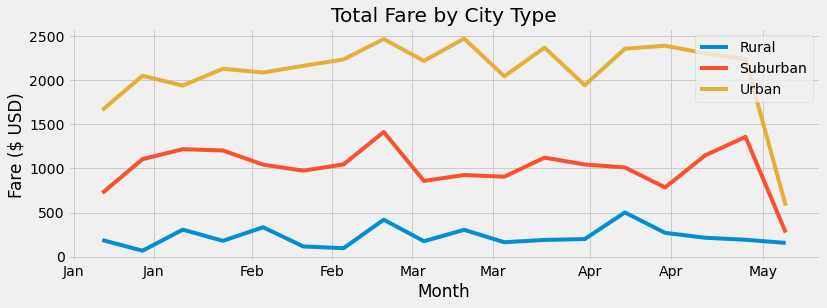

In [286]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
from matplotlib.dates import DateFormatter
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(janToAprilByWeekdf)
ax.set(title = "Total Fare by City Type",
      xlabel = "Month",
      ylabel = "Fare ($ USD)")

#found this from https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/
dateForm = DateFormatter("%b")
ax.xaxis.set_major_formatter(dateForm)
ax.legend(["Rural", "Suburban", "Urban"], loc = "upper right", frameon = True)

plt.savefig("Analysis/PyBer_fare_summary.png")